In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import gzip
import matplotlib.pyplot as plt
from sklearn import metrics
import os
import string
import glob
# import re
# import nltk

In [2]:
#useful function
bound = 1e-16
def sigmoid(x):
    if x>0:
        result= 1/(1+np.exp(-x))
    else:
        result = np.exp(x)/(1+np.exp(x))
    if result >1-bound:
        result = 1-bound
    elif result < bound:
        result = bound
        
    return result

In [3]:
all_spam_train= "/Users/Jun/Documents/18661_ML/hw3_data/spam/train/token_spam.txt"
all_ham_train = "/Users/Jun/Documents/18661_ML/hw3_data/spam/train/token_ham.txt"
all_spam_test= "/Users/Jun/Documents/18661_ML/hw3_data/spam/test/token_spam.txt"
all_ham_test="/Users/Jun/Documents/18661_ML/hw3_data/spam/test/token_ham.txt"

spam_train_path="/Users/Jun/Documents/18661_ML/hw3_data/spam/train/spam"
ham_train_path="/Users/Jun/Documents/18661_ML/hw3_data/spam/train/ham"
spam_test_path="/Users/Jun/Documents/18661_ML/hw3_data/spam/test/spam"
ham_test_path="/Users/Jun/Documents/18661_ML/hw3_data/spam/test/ham"
txtcounter = len(glob.glob1(spam_train_path,"*.txt"))
print(txtcounter)

123


In [4]:
#creat a dictionary to store dic
diction="/Users/Jun/Documents/18661_ML/hw3_data/spam/dic.txt"
di= open(diction)
dic1=di.read().split()
#print(di)
a=[]
i=1
while i<=1014:
    a.append(i)
    i+=1
dic=dict(zip(dic1,a))
#print(dic)
#print(dic1)

In [5]:
#create the train spam matrix
spam_train_path="/Users/Jun/Documents/18661_ML/hw3_data/spam/train/spam/"
m1=np.zeros(1014)
train_spam= []
print(len(glob.glob(spam_train_path+"*.txt")))
for path_to_file in glob.glob(spam_train_path+"*.txt"):
    fi = open(path_to_file,'r',errors="ignore")
    try:
        lines= fi.readlines()
        for i in range(0,lines.__len__(),1):
            for word in lines[i].split():
                word = word.strip(string.digits)
                word = word.strip(string.whitespace)
                word = word.strip(string.punctuation)
                word= word.lower()
                if len(word)>0:
                    train_spam.append(word)
    except:
        print(path_to_file)
for i in train_spam:
    if i in dic1:
        m1[dic[i]-1]+=1
    else:
        continue
#print(m1)
mc1=m1.copy()
l1=mc1.argsort()[-3:]
print(l1)
for i in l1:
    print(m1[i])
    print(dic1[i])
#print(len(glob.glob(spam_train_path+"*.txt")))

123
[914 374 606]
60.0
http
65.0
price
136.0
subject


training spam {(subject: 135 of occurrences), (price: 65 of occurences), (http: 60 of occurences)}

In [6]:
#create the train ham matrix
ham_train_path="/Users/Jun/Documents/18661_ML/hw3_data/spam/train/ham/"
m2=np.zeros(1014)
train_ham = []
print(len(glob.glob(ham_train_path+"*.txt")))
for path_to_file in glob.glob(ham_train_path+"*.txt"):
    fi = open(path_to_file)
    lines= fi.readlines()
    for i in range(0,lines.__len__(),1):
        for word in lines[i].split():
            word = word.strip(string.digits)
            word = word.strip(string.whitespace)
            word = word.strip(string.punctuation)
            word= word.lower()
            if len(word)>0:
                train_ham.append(word)
for i in train_ham:

    if i in dic:
        m2[dic[i]-1]+=1
    else:
        continue
mc2=m2.copy()
l2=mc2.argsort()[-3:]
print(l2)
for i in l2:
    print(m2[i])
    print(dic1[i])

340
[916 606 768]
310.0
will
566.0
subject
600.0
enron


training ham {(enron: 600 of occurrences), (subject: 566 of occurences), (will: 310 of occurences)}

In [7]:
#combine the spam and ham in train data
m3=np.zeros(1014)
for i in range(1014):
    m3[i]=m1[i]+m2[i]
mc3=m3.copy()
l3=mc3.argsort()[-4:]
print(l3)
for i in l3:
    print(m3[i])
    print(dic1[i]) 

[401 916 768 606]
291.0
please
351.0
will
600.0
enron
702.0
subject


Q 4.2

training spam and ham {(enron: 600 of occurrences), (will: 351 of occurences), (please: 291 of occurences)}

In [8]:
#union the spam and ham train data into a matrix and feature for spam is 1 and ham is 0
mtrain=[]
y=np.zeros((463,1))
count = 0
for path_to_file in glob.glob("/Users/Jun/Documents/18661_ML/hw3_data/spam/train/spam/"+"*.txt"):
    m1=np.zeros(1014)
    train_spam= []
    fi = open(path_to_file)
    try:
        lines= fi.readlines()
        for i in range(0,lines.__len__(),1):
            for word in lines[i].split():
                word = word.strip(string.digits)
                word = word.strip(string.whitespace)
                word = word.strip(string.punctuation)
                word= word.lower()
                if len(word)>0:
                    train_spam.append(word)
    except:
        print(path_to_file)
    for i in train_spam:
        if i in dic1:
            m1[dic[i]-1]+=1
        else:
            continue
    mtrain.append(m1)
    y[count]=1
    count+=1

for path_to_file in glob.glob("/Users/Jun/Documents/18661_ML/hw3_data/spam/train/ham/"+"*.txt"):
    m2=np.zeros(1014)
    train_ham= []
    fi = open(path_to_file)
    try:
        lines= fi.readlines()
        for i in range(0,lines.__len__(),1):
            for word in lines[i].split():
                word = word.strip(string.digits)
                word = word.strip(string.whitespace)
                word = word.strip(string.punctuation)
                word= word.lower()
                if len(word)>0:
                    train_ham.append(word)
    except:
        print(path_to_file)
    for i in train_ham:
        if i in dic1:
            m2[dic[i]-1]+=1
        else:
            continue
    mtrain.append(m2)
    y[count]=0
    count+=1
# print(mtrain)

/Users/Jun/Documents/18661_ML/hw3_data/spam/train/spam/2248.2004-09-23.GP.spam.txt


grad = (x_train.T @ (sigmoid(x @w)-y))

w = w-eta*grad

loss = -(y * sigmoid(x@w)+(1-y)*sigmoid(x@w))

In [9]:
x_train= np.c_[mtrain]
x_train=np.expand_dims(x_train, axis=1)
x_train[5]

array([[0., 0., 0., ..., 0., 1., 0.]])

In [10]:
# print(x_train.shape)
# f=np.expand_dims(x_train, axis=1)
# print(f[1].T.shape) #numpy.ndarray
# print(x_train[1,:].shape)
# print(y.shape)
# print(y[1])#numpy.ndarray
# print((x_train@w).shape)#numpy.ndarray

In [11]:
def cross_entropy(x,y,w,b,lamda):
    entropy = lamda*(np.linalg.norm(w.transpose())**2)
    
    for i in range(x_train.shape[0]):
        entropy -= (y[i]*np.log(sigmoid(b+(w.T @ x[i])))
                    +(1-y[i])*np.log(1 - sigmoid(b+(w.T @ x[i]))))
        #print(entropy)
    return entropy

def grad_w(x,y,w,b,lamda):
    row=x.shape[0]
    col= x.shape[1]
    grad = np.zeros(col)
    for i in range(row):
        h = sigmoid(b+(w.T @ x[i]))
        grad+=(h-y[i])*x[i]
    grad+=2*lamda*w
    return grad
       
def grad_b(x,y,w,b):
    row=x.shape[0]
    col= x.shape[1]
    grad = 0
    for i in range(row):
        h = sigmoid(b+(w.T @ x[i]))
        grad+=(h-y[i])
    return grad

In [12]:
steps = np.linspace(1,50,50)
steps[1]
print(x_train)

[[[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]]


2.552451100162659
7.974603057245541
28.562367040293875
55.838766334208415
277.2600567216183


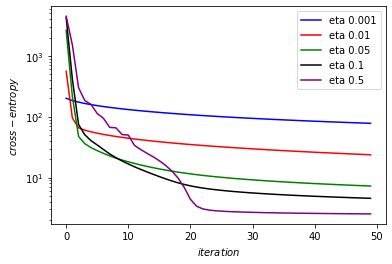

In [13]:
#q4.4b
x_train= np.c_[mtrain]
itera = 50
n=x_train.shape[0]
d=x_train.shape[1]
lamda = 0
p=0
etas = [0.001, 0.01, 0.05, 0.1, 0.5]
colors=[ 'blue','red','green','black','purple']

for index in range(len(etas)):
    eta = etas[index]
    cross_entropy_list=[]
    w = np.zeros(d)
    b=0.1
    for i in range(itera):
        
        
        w_grad= grad_w(x_train,y,w,b,lamda)
   
        b_grad = grad_b(x_train,y,w,b)
       
        
        w-=eta*w_grad
        b-=eta*b_grad
        entropy=cross_entropy(x_train,y,w,b,lamda)
        cross_entropy_list.append(entropy)
    print(np.sqrt(np.sum(w**2)))
    plt.figure(p)
    plt.yscale('log')
    plt.plot(range(0,50),cross_entropy_list, color=colors[index], label='eta ' + str(eta))
    plt.ylabel("$cross-entropy$")
    plt.xlabel("$iteration$")
    plt.legend()


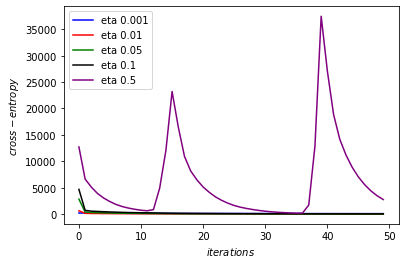

In [25]:
#q4.4c
x_train= np.c_[mtrain]
itera = 50
n=x_train.shape[0]
d=x_train.shape[1]
lamda = 0.1
p=0
etas = [0.001, 0.01, 0.05, 0.1, 0.5]
colors=[ 'blue','red','green','black','purple']
for index in range(len(etas)):
    eta = etas[index]
    cross_entropy_list=[]
    w = np.zeros(d)
    b=0.1
    for i in range(itera):
        #entropy=cross_entropy(x_train,y,w,b,lamda)
        
        w_grad= grad_w(x_train,y,w,b,lamda)
   
        b_grad = grad_b(x_train,y,w,b)
       
        
        w-=eta*w_grad
        b-=eta*b_grad
        entropy=cross_entropy(x_train,y,w,b,lamda)
        cross_entropy_list.append(entropy)
    plt.figure(p)
    #plt.yscale('log')
    plt.plot(range(0,50),cross_entropy_list, color=colors[index], label='eta ' + str(eta))
    plt.ylabel("$cross-entropy$")
    plt.xlabel("$iterations$")
    plt.legend()


In [15]:
#q4.4c
x_train= np.c_[mtrain]
itera = 50
n=x_train.shape[0]
d=x_train.shape[1]
lamdas = [0,0.1,0.2,0.3,0.4,0.5]
p=0
eta = 0.01
for lamda in lamdas:
    cross_entropy_list=[]
    w = np.zeros(d)
    b=0.1
    for i in range(itera):
        
        
        w_grad= grad_w(x_train,y,w,b,lamda)
   
        b_grad = grad_b(x_train,y,w,b)
       
        
        w-=eta*w_grad
        b-=eta*b_grad
        entropy=cross_entropy(x_train,y,w,b,lamda)
        cross_entropy_list.append(entropy)
    print(np.sqrt(np.sum(w**2)))

7.974603057245541
7.48658704629696
7.049879176977135
6.659441159154358
6.310591442593458
5.998989317229012


for test data

In [16]:
#create the test spam matrix
spam_test_path="/Users/Jun/Documents/18661_ML/hw3_data/spam/test/spam/"
m3=np.zeros(1014)
test_spam=[]
for path_to_file in glob.glob(spam_test_path+"*.txt"):
    fi = open(path_to_file,'r',errors="ignore")
    #print(len(glob.glob(spam_test_path+"*.txt")))
    try:
        lines= fi.readlines()
        for i in range(0,lines.__len__(),1):
            for word in lines[i].split():
                word = word.strip(string.digits)
                word = word.strip(string.whitespace)
                word = word.strip(string.punctuation)
                word= word.lower()
                if len(word)>0:
                    test_spam.append(word)
    except:
        print(path_to_file)
        
for i in test_spam:
    if i in dic:
        m3[dic[i]-1]+=1
    else:
        continue


In [17]:
#create the test ham matrix
ham_test_path="/Users/Jun/Documents/18661_ML/hw3_data/spam/test/ham/"
m4=np.zeros(1014)
test_ham=[]
for path_to_file in glob.glob(ham_test_path+"*.txt"):
    fi = open(path_to_file)
    #print(len(glob.glob(ham_test_path+"*.txt")))
    try:
        lines= fi.readlines()
        for i in range(0,lines.__len__(),1):
            for word in lines[i].split():
                word = word.strip(string.digits)
                word = word.strip(string.whitespace)
                word = word.strip(string.punctuation)
                word= word.lower()
                if len(word)>0:
                    test_ham.append(word)
    except:
        print(path_to_file)
        
for i in test_ham:
    if i in dic:
        m4[dic[i]-1]+=1
    else:
        continue


In [18]:
#union the spam and ham train data into a matrix and feature for spam is 1 and ham is 0
mtest=[]
y=np.zeros((478,1))
count = 0
for path_to_file in glob.glob("/Users/Jun/Documents/18661_ML/hw3_data/spam/test/spam/"+"*.txt"):
    m1=np.zeros(1014)
    test_spam= []
    fi = open(path_to_file,'r',errors="ignore")
    try:
        lines= fi.readlines()
        for i in range(0,lines.__len__(),1):
            for word in lines[i].split():
                word = word.strip(string.digits)
                word = word.strip(string.whitespace)
                word = word.strip(string.punctuation)
                word= word.lower()
                if len(word)>0:
                    test_spam.append(word)
    except:
        print(path_to_file)
    for i in test_spam:
        if i in dic1:
            m1[dic[i]-1]+=1
        else:
            continue
    mtest.append(m1)
    y[count]=1
    count+=1

for path_to_file in glob.glob("/Users/Jun/Documents/18661_ML/hw3_data/spam/test/ham/"+"*.txt"):
    m2=np.zeros(1014)
    test_ham= []
    fi = open(path_to_file,'r',errors="ignore")
    try:
        lines= fi.readlines()
        for i in range(0,lines.__len__(),1):
            for word in lines[i].split():
                word = word.strip(string.digits)
                word = word.strip(string.whitespace)
                word = word.strip(string.punctuation)
                word= word.lower()
                if len(word)>0:
                    test_ham.append(word)
    except:
        print(path_to_file)
    for i in test_ham:
        if i in dic1:
            m2[dic[i]-1]+=1
        else:
            continue
    mtest.append(m2)
    y[count]=0
    count+=1
# print(mtrain)

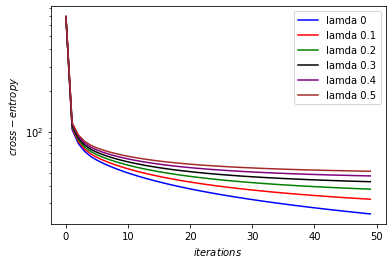

In [19]:
#q4.4c
x_test= np.c_[mtest]
itera = 50
n=x_test.shape[0]
d=x_test.shape[1]
lamdas = [0,0.1,0.2,0.3,0.4,0.5]
p=0
eta = 0.01
colors=[ 'blue','red','green','black','purple','brown']
for index in range(len(lamdas)):
    lamda = lamdas[index]
    cross_entropy_list=[]
    w = np.zeros(d)
    b=0.1
    for i in range(itera):
        
        
        w_grad= grad_w(x_test,y,w,b,lamda)
   
        b_grad = grad_b(x_test,y,w,b)
       
        
        w-=eta*w_grad
        b-=eta*b_grad
        entropy=cross_entropy(x_test,y,w,b,lamda)
        cross_entropy_list.append(entropy)
    plt.figure(p)
    plt.yscale('log')
    plt.plot(range(0,50),cross_entropy_list, color=colors[index], label='lamda ' + str(lamda))
    plt.ylabel("$cross-entropy$")
    plt.xlabel("$iterations$")
    plt.legend()